In [0]:
%tensorflow_version 2.x

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import EarlyStopping

In [0]:
df = pd.read_csv("https://raw.githubusercontent.com/marianwitkowski/python-data/master/titanic/titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [0]:
from collections import Counter
def detect_outliers_values(df,n,features):

    outlier_indices = []
    
    for col in features:   
        Q1 = np.percentile(df[col], 25)
        Q3 = np.percentile(df[col],75)
        IQR = Q3 - Q1
        outlier_step = 1.5 * IQR
        
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | 
                              (df[col] > Q3 + outlier_step )].index
        outlier_indices.extend(outlier_list_col)
   
    outlier_indices = Counter(outlier_indices)  
    multiple_outliers = list( k for k, v in outlier_indices.items() if v > n )
    return multiple_outliers   

for_out = detect_outliers_values(df,2,["Age","SibSp","Parch","Fare"])
df = df.drop(for_out, axis = 0).reset_index(drop=True)

In [0]:
df.Age.replace(np.NaN, df["Age"].median(), inplace=True)

df.Embarked = df.Embarked.map({"S":0, "C":1, "Q":2})
df.Sex.replace(['male','female'], [0,1], inplace=True)

dataset_title = [i.split(",")[1].split(".")[0].strip() for i in df["Name"]]
df["Title"] = pd.Series(dataset_title)
df["Title"].replace(['Lady', 'the Countess',
                       'Capt', 'Col','Don', 'Dr', 
                       'Major', 'Rev', 'Sir', 'Jonkheer',
                       'Dona'], 'Rare', inplace=True)

df["Title"] = df["Title"].map({"Master":0, "Miss":1, "Ms" : 1 ,
                                         "Mme":1, "Mlle":1, "Mrs":1, "Mr":2, 
                                         "Rare":3})

df["Title"] = df["Title"].astype(int)

df["Famize"] = df["SibSp"] + df["Parch"] + 1
df.drop(labels = ["SibSp",'Parch'], axis = 1, inplace = True)

df.drop(labels = ["Ticket",'Cabin','PassengerId','Name'], axis = 1, inplace = True)
df.dropna(axis=0, how='any', inplace=True)

In [0]:
df.sample(10)

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,Famize
780,0,3,0,8.0,29.1250,2.0,0,6
105,1,3,0,28.0,7.7750,0.0,2,1
602,1,1,1,40.0,153.4625,0.0,1,1
648,0,2,0,24.0,73.5000,0.0,2,3
231,0,2,0,44.0,26.0000,0.0,2,2
287,0,2,0,36.0,12.8750,1.0,2,1
725,0,2,0,28.0,0.0000,0.0,2,1
38,1,3,1,14.0,11.2417,1.0,1,2
732,0,3,0,28.0,7.8958,0.0,2,1
363,1,1,0,25.0,55.4417,1.0,2,2


In [0]:
X = df.iloc[:, 1:].values
y = df["Survived"].values

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [0]:
X_scaled = MinMaxScaler().fit_transform(X)

In [0]:
#X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=0)

In [0]:
model = Sequential()
model.add(Dense(500, input_dim=7, activation='relu'))
model.add(Dense(10, activation='sigmoid'))
model.add(Dropout(0.1))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [0]:
es = EarlyStopping(monitor='loss', verbose=1, patience=5)
model.fit(X_scaled, y, epochs=250, batch_size=5, verbose=0, callbacks=[es])

Epoch 00032: early stopping


In [0]:
dfr = pd.DataFrame(model.history.history)
dfr

,loss,accuracy
0,0.542873,0.739477
1,0.466936,0.790671
2,0.460043,0.796359
3,0.445250,0.806598
4,0.432221,0.815700
5,0.431524,0.815700
6,0.431928,0.819113
7,0.424111,0.820250
8,0.417091,0.833902
9,0.412043,0.824801


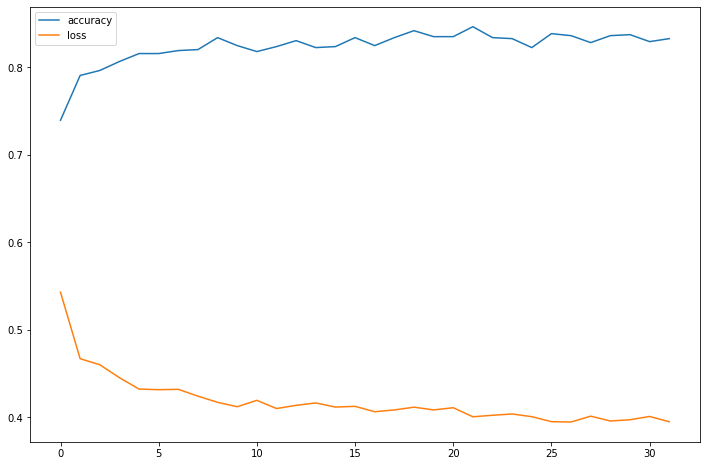

In [0]:
dfr[ [ "accuracy", "loss"] ].plot(figsize=(12,8))